## 1. Digits Classification
Using mnist dataset, we will apply simple neural network to classify hand-written digits

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### download a mnist dataset

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #load mnist dataset

11490434/11490434 [==============================] - 1s 0us/step


In [8]:
len(X_train) # 60000 numbers of digits

60000

In [9]:
X_train.shape # each digit consist of 28x28 grid matrix

(60000, 28, 28)

In [10]:
X_train[0] #each value: 0 to 255 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

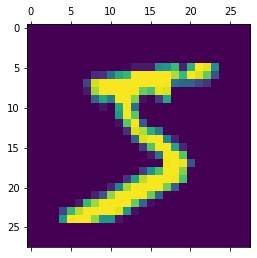

In [11]:
plt.matshow(X_train[0]) #handwritten 5

In [12]:
y_train[0] # the answer is also 5

5

In [14]:
X_train.shape[1]

28

In [17]:
#flatten the 28 x 28 grid 
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[2])

In [18]:
X_train_flatten.shape # succeded in flattening

(60000, 784)

In [19]:
X_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### simple neural network

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
    # dense: all the neurons are connected to other neurons in the next layer
    # Dense(output_shape, input_shape)
    # output = 0-9 -> 10
])

#compile the model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', #category to 0-9
    metrics = ['accuracy'] #to make it more accurate
) 

# training happens
model.fit(X_train_flatten, y_train, epochs=5)

#accuracy can be improved -> we need to scale the value into 0-1

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 9.7317 - accuracy: 0.8389
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 6.0492 - accuracy: 0.8810
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.7010 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.4926 - accuracy: 0.8861
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.5598 - accuracy: 0.8856


In [25]:
X_train = X_train / 255
X_test = X_test / 255

In [26]:
#flatten the 28 x 28 grid 
X_train_flatten = X_train.reshape(len(X_train), X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test.reshape(len(X_test), X_test.shape[1]*X_test.shape[2])

In [27]:
X_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
    # dense: all the neurons are connected to other neurons in the next layer
    # Dense(output_shape, input_shape)
    # output = 0-9 -> 10
])

#compile the model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', #category to 0-9
    metrics = ['accuracy'] #to make it more accurate
) 

# training happens
model.fit(X_train_flatten, y_train, epochs=5)

#accuracy is great!

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4684 - accuracy: 0.8780
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3042 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2663 - accuracy: 0.9256


In [29]:
# apply test set and see the results
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 0.2673 - accuracy: 0.9246


[0.26733916997909546, 0.9246000051498413]

In [30]:
model.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


array([[2.0962106e-02, 5.5016301e-07, 8.6471565e-02, ..., 9.9980104e-01,
        1.0001347e-01, 7.1174341e-01],
       [4.7959533e-01, 9.5892474e-03, 9.9951029e-01, ..., 1.6313535e-12,
        1.4281340e-01, 2.0841178e-09],
       [4.0551875e-04, 9.9484515e-01, 6.4341104e-01, ..., 1.7460835e-01,
        3.7859479e-01, 4.7008928e-02],
       ...,
       [3.0688479e-06, 6.8095374e-06, 1.3086244e-03, ..., 2.2102758e-01,
        5.2462602e-01, 7.9244459e-01],
       [1.1923022e-04, 3.0466993e-04, 1.5429995e-04, ..., 3.1490799e-05,
        5.7312846e-01, 1.1480369e-04],
       [7.4598738e-03, 4.4730922e-10, 1.6375276e-01, ..., 2.7252947e-08,
        1.6737339e-04, 6.4958533e-07]], dtype=float32)

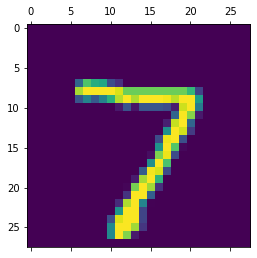

In [31]:
 plt.matshow(X_test[0]) # the first image

In [32]:
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 1s 3ms/step


In [33]:
y_predicted[0] # show the score for the first image 

array([2.0962106e-02, 5.5016301e-07, 8.6471565e-02, 9.5537883e-01,
       2.7607582e-03, 1.2441459e-01, 1.5105861e-06, 9.9980104e-01,
       1.0001347e-01, 7.1174341e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0]) # the maximized score! answer is 7

7

In [37]:
# we need the result considering the biggest score!
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #There we go!

[7, 2, 1, 0, 4]

In [40]:
#Confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    4,    2,    1,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,   13,  927,   16,    8,    2,   10,   10,   35,    5],
       [   4,    1,   22,  919,    0,   23,    2,   12,   19,    8],
       [   2,    2,    7,    1,  910,    0,    7,    4,    8,   41],
       [  11,    3,    5,   33,   10,  771,   13,    6,   32,    8],
       [  15,    3,    8,    1,    8,   11,  908,    2,    2,    0],
       [   1,    8,   22,    8,    7,    0,    0,  941,    1,   40],
       [   8,   14,    7,   23,    9,   23,    9,   11,  859,   11],
       [  11,    7,    1,   10,   23,    5,    0,   17,    6,  929]])>

Text(69.0, 0.5, 'Truth')

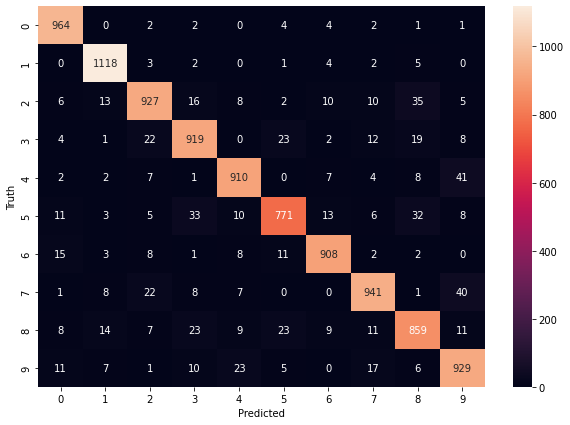

In [42]:
#visualize the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# interpretation: 964 was actually 0 and predicted 0 -> high performance!
# the other numbers in the black boxes are errors 

In [44]:
# add hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    # dense: all the neurons are connected to other neurons in the next layer
    # Dense(# of neurons, input_shape)
    keras.layers.Dense(10, activation='sigmoid') #hidden layer
])

#compile the model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', #category to 0-9
    metrics = ['accuracy'] #to make it more accurate
) 

# training happens
model.fit(X_train_flatten, y_train, epochs=5)

#due to hidden layers, training speed has slowed down but accuracy is greater!

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2720 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1227 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0853 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0647 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0518 - accuracy: 0.9840


In [45]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0867 - accuracy: 0.9742


[0.08668243885040283, 0.9742000102996826]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

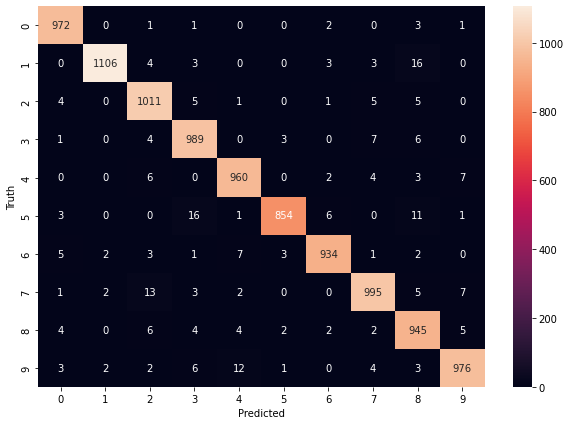

In [46]:
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #There we go!

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#better classification!

In [50]:
# add hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # you don't need to flatten before making a neural network
    keras.layers.Dense(100, activation='relu'), # you need to delete the input_shape here 
    keras.layers.Dense(10, activation='sigmoid')
])

#compile the model
model.compile(
    optimizer = 'adam', 
    loss = 'sparse_categorical_crossentropy', #category to 0-9
    metrics = ['accuracy'] #to make it more accurate
) 

# training happens
model.fit(X_train, y_train, epochs=5) # you don't need to use X_train_flatten here

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2683 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1217 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0646 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0516 - accuracy: 0.9840


In [56]:
# you can try different loss functions or optimizers 
# loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/losses
# optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # you don't need to flatten before making a neural network
    keras.layers.Dense(100, activation='relu'), # you need to delete the input_shape here 
    keras.layers.Dense(10, activation='sigmoid')
])

#compile the model
model.compile(
    optimizer = 'SGD', 
    loss = 'mean_squared_error',
    metrics = ['accuracy'] #to make it more accurate
) 

# training happens
model.fit(X_train, y_train, epochs=5) # you don't need to use X_train_flatten here

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.3484 - accuracy: 0.0980
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2800 - accuracy: 0.0956
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2788 - accuracy: 0.0970
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2783 - accuracy: 0.0971
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 20.2780 - accuracy: 0.0985


313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

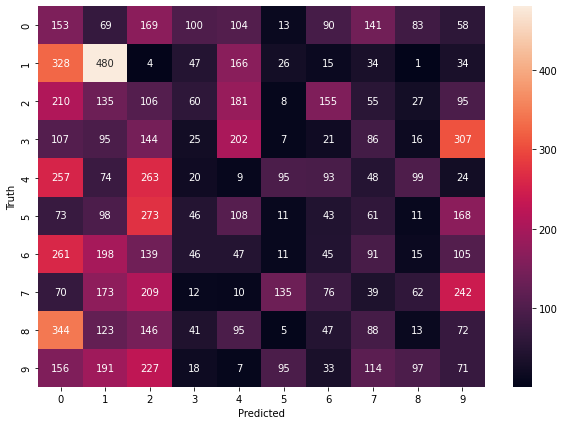

In [57]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #There we go!

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#BAD! maybe mean squred error is more appropriate for regression not classification